# Lab05 Python Data Science with Pandas

## Please submit your finished lab05 jupyter notebook via pull request in GitHub

In [1]:
# magic command to display matplotlib plots inline within the ipython notebook webpage
%matplotlib inline

# import necessary modules
import pandas as pd, numpy as np, matplotlib.pyplot as plt

## Part 1 <br /> Basics of Selecting and Slicing Data

In [2]:
# create a pandas dataframe from the location data set
df = pd.read_csv('data/summer-travel-gps-full.csv')
df.head()

,lat,lon,date,city,country
0,51.481292,-0.451011,05/14/2014 09:07,West Drayton,United Kingdom
1,51.474005,-0.450999,05/14/2014 09:22,Hounslow,United Kingdom
2,51.478199,-0.446081,05/14/2014 10:51,Hounslow,United Kingdom
3,51.478199,-0.446081,05/14/2014 11:24,Hounslow,United Kingdom
4,51.474146,-0.451562,05/14/2014 11:38,Hounslow,United Kingdom


In [3]:
# Q1: how to get 2 columns from the dataframe (city and country)?
df[['city', 'country']]

,city,country
0,West Drayton,United Kingdom
1,Hounslow,United Kingdom
2,Hounslow,United Kingdom
3,Hounslow,United Kingdom
4,Hounslow,United Kingdom
...,...,...
1754,Munich,Germany
1755,Munich,Germany
1756,Munich,Germany
1757,Munich,Germany


To get a single "cell's" value out of a dataframe, pass a column name, then a row label. This is equivalent to slicing the dataframe down to a single series, then slicing a single value out of that series using [ ] indexing.

In [4]:
# Q2: how to get the first 5 rows of the "city" column?
df[['city']].head()

,city
0,West Drayton
1,Hounslow
2,Hounslow
3,Hounslow
4,Hounslow


### Using .loc[ ]

In [5]:
# Q3: how to use .loc to select the third row of the dataframe?
df.loc[[3]]

,lat,lon,date,city,country
3,51.478199,-0.446081,05/14/2014 11:24,Hounslow,United Kingdom


In [6]:
# Q4: how to use .loc to select the first row in "country" column?
df['country'].loc[1]

'United Kingdom'

In [7]:
# Q5: how to select the first 4 rows of ['city', 'date'] columns?
df[['city','date']].loc[:3]

,city,date
0,West Drayton,05/14/2014 09:07
1,Hounslow,05/14/2014 09:22
2,Hounslow,05/14/2014 10:51
3,Hounslow,05/14/2014 11:24


### Using .iloc[ ]

In [8]:
# use .iloc for integer position based indexing
# Q6: how to get the value from the row in position 3 and the column in position 2
df.iloc[3,2]

'05/14/2014 11:24'

In [9]:
# Q7: how to use iloc to select every 300th row from a data set
df.iloc[0::300]

,lat,lon,date,city,country
0,51.481292,-0.451011,05/14/2014 09:07,West Drayton,United Kingdom
300,41.377091,2.151175,05/20/2014 03:18,Barcelona,Spain
600,50.052338,19.946220,05/31/2014 21:10,Krakow,Poland
900,48.561181,9.059672,06/09/2014 15:12,Tübingen,Germany
1200,41.378301,2.187443,06/17/2014 16:37,Barcelona,Spain
1500,42.208201,20.735993,06/30/2014 08:27,Prizren,Kosovo


## Part 2 <br /> How to select rows by some value(s)

In [10]:
# load a reduced set of gps data
df = pd.read_csv('data/summer-travel-gps-simplified.csv')
df.tail()

,lat,lon,date,city,country
173,41.044556,28.983286,07/08/2014 16:44,Istanbul,Turkey
174,41.008992,28.968268,07/08/2014 20:03,Istanbul,Turkey
175,41.043487,28.985488,07/08/2014 22:18,Istanbul,Turkey
176,40.977637,28.823879,07/09/2014 09:03,Istanbul,Turkey
177,48.357110,11.791346,07/09/2014 13:20,Munich,Germany


In [11]:
# Q9: create a Series of true/false, indicating if each "city" row in the column is equal to "Munich"
df['true_or_flase'] =(df["city"] == "Munich")
df.tail()

,lat,lon,date,city,country,true_or_flase
173,41.044556,28.983286,07/08/2014 16:44,Istanbul,Turkey,False
174,41.008992,28.968268,07/08/2014 20:03,Istanbul,Turkey,False
175,41.043487,28.985488,07/08/2014 22:18,Istanbul,Turkey,False
176,40.977637,28.823879,07/09/2014 09:03,Istanbul,Turkey,False
177,48.357110,11.791346,07/09/2014 13:20,Munich,Germany,True


In [12]:
# pandas logical operators are: | for or, & for and, ~ for not
# these must be grouped by using parentheses
# Q10: what cities were visited in spain that were not barcelona? Create a dataframe for it.
data = df[df['country'] == 'Spain']
data2 = data[data['city'] != 'Barcelona']
data2

,lat,lon,date,city,country,true_or_flase
24,41.303911,2.105931,05/18/2014 22:35,El Prat de Llobregat,Spain,False
25,41.289946,2.064590,05/18/2014 23:04,Viladecans,Spain,False
126,41.306752,2.097624,06/12/2014 17:19,El Prat de Llobregat,Spain,False
127,41.304333,2.072728,06/12/2014 17:49,El Prat de Llobregat,Spain,False
131,41.358460,2.128701,06/13/2014 11:35,Hospitalet de Llobregat,Spain,False
138,41.294761,2.059722,06/20/2014 22:15,Viladecans,Spain,False


In [13]:
# Q11: select rows where either the city is munich, or the country is serbia
d = df[(df['city'] == 'Munich') | (df['country'] == 'Serbia')]
d

,lat,lon,date,city,country,true_or_flase
139,44.821164,20.289821,06/21/2014 01:59,Belgrade,Serbia,False
140,44.820414,20.463465,06/21/2014 18:44,Belgrade,Serbia,False
141,44.761583,19.577904,06/22/2014 07:58,Slepčević,Serbia,False
177,48.357110,11.791346,07/09/2014 13:20,Munich,Germany,True


In [14]:
# Q12: how many observations are west of the prime meridian?
df[df['lon'] < 0].count()

lat              24
lon              24
date             24
city             24
country          24
true_or_flase    24
dtype: int64

In [15]:
# Q13: get all rows that contain a city that starts with the letter G
df[df['city'].str.startswith('G')]

,lat,lon,date,city,country,true_or_flase
62,50.273632,18.729429,06/02/2014 06:39,Gliwice,Poland,False
114,48.282940,8.199630,06/10/2014 13:33,Gutach,Germany,False
115,48.389029,8.021342,06/10/2014 13:48,Gengenbach,Germany,False
152,40.187825,20.079303,07/04/2014 17:42,Gjirokastër,Albania,False


In [16]:
# Q14: how many unique cities and countries in the dataset? 
# Also can you check missing values for the dataframe
count1 = df.city.unique().size
count2 = df.country.unique().size
print("The number of unique cities and countries:" + " "+ str(count1) +" and "+ str(count2))

#df[df.isnull().any(axis=1)]
df.isnull().any()

The number of unique cities and countries: 91 and 15


lat              False
lon              False
date             False
city             False
country          False
true_or_flase    False
dtype: bool

In [30]:
# Q15: group by country name and show the city names in each of the country

#df.groupby('country')['city'].apply(lambda x: "%s" % ', '.join(x))
df.groupby('country')['city'].agg(['unique'])

,unique
country,
Albania,"[Berat, Gjirokastër]"
Bosnia and Herzegovina,"[Sarajevo, Mostar]"
Croatia,"[Ploče, Split, Dubrovnik]"
Czech Republic,"[Novy Bohumin, Hranice, Prerov, Ústí nad Orlic..."
Germany,"[Kümmersbruck, Winkelhaid, Kammerstein, Ellhof..."
Greece,"[Kakavia, Dytiki Ellada, Peloponnese, Athens, ..."
Kosovo,[Prizren]
Macedonia (FYROM),[Ohrid]
Montenegro,[Kotor]


## Part 3 <br /> How to select based on a date-time values

In [34]:
# load the location data set, indexed by the date field
# and, parse the dates so they're no longer strings but now rather Python datetime objects
# this lets us do date and time based operations on the data set
dt = pd.read_csv('data/summer-travel-gps-full.csv', index_col='date', parse_dates=True)
dt.head()

,lat,lon,city,country
date,,,,
2014-05-14 09:07:00,51.481292,-0.451011,West Drayton,United Kingdom
2014-05-14 09:22:00,51.474005,-0.450999,Hounslow,United Kingdom
2014-05-14 10:51:00,51.478199,-0.446081,Hounslow,United Kingdom
2014-05-14 11:24:00,51.478199,-0.446081,Hounslow,United Kingdom
2014-05-14 11:38:00,51.474146,-0.451562,Hounslow,United Kingdom


In [46]:
# Q16: is the timestamp index unique? How can you use code to find it? 
dt[dt.index.duplicated()]

,lat,lon,city,country
date,,,,
2014-07-05 00:52:00,38.541479,21.284091,Dytiki Ellada,Greece


In [63]:
# Q17: drop duplicate index 
dt2 = dt[~dt.index.duplicated()]
dt2.head()

,lat,lon,city,country
date,,,,
2014-05-14 09:07:00,51.481292,-0.451011,West Drayton,United Kingdom
2014-05-14 09:22:00,51.474005,-0.450999,Hounslow,United Kingdom
2014-05-14 10:51:00,51.478199,-0.446081,Hounslow,United Kingdom
2014-05-14 11:24:00,51.478199,-0.446081,Hounslow,United Kingdom
2014-05-14 11:38:00,51.474146,-0.451562,Hounslow,United Kingdom


In [79]:
# Q18: create a weekday and a weekend dataframe
dt2_weekday = dt2[dt2.index.dayofweek <= 4]
dt2_weekend = dt2[dt2.index.dayofweek > 4]
dt2_weekday.head()
dt2_weekend.head()

,lat,lon,city,country
date,,,,
2014-05-17 00:09:00,38.711824,-9.137308,Lisbon,Portugal
2014-05-17 00:39:00,38.711833,-9.137317,Lisbon,Portugal
2014-05-17 01:09:00,38.711822,-9.137277,Lisbon,Portugal
2014-05-17 01:39:00,38.711823,-9.137273,Lisbon,Portugal
2014-05-17 01:54:00,38.711828,-9.137279,Lisbon,Portugal


(Text(0, 0.5, 'Count'), Text(0.5, 0, 'Weekday'))

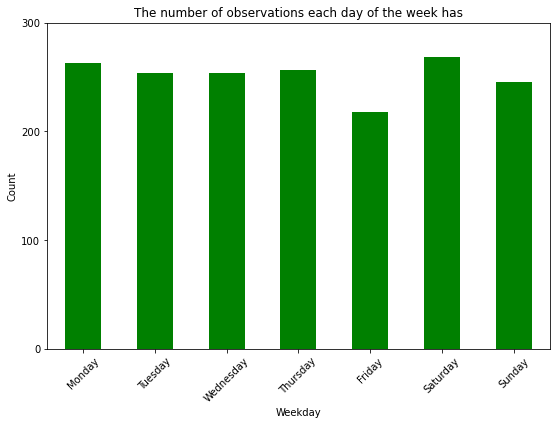

In [97]:
# Q19: calculate and plot the number of observations each day of the week has
count = dt2.groupby('weekday').count()
count.index = pd.Series(['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
plot = count['country'].plot(kind='bar',yticks=[0,100,200,300],figsize=(9,6), color = 'green', rot =45, title = 'The number of observations each day of the week has')
plot.set_ylabel('Count'),plot.set_xlabel('Weekday')